In [83]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Graphs style
plt.style.use('ggplot')

In [84]:
# Generating a dataset (y_data are normally distributed!)
N = 100
x_data = np.arange(0, N, 1)
y_data = x_data + np.random.normal(0, 1, size= N)

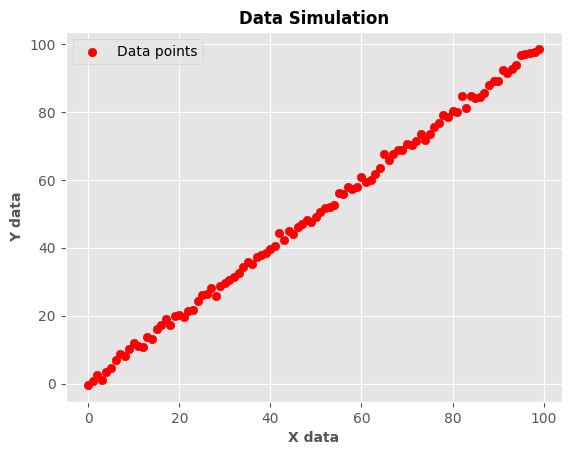

In [85]:
# Generating the data plot
plt.scatter(x_data, y_data, label= "Data points", color= "red")
plt.title("Data Simulation", fontweight= "bold", fontsize= 12)
plt.xlabel("X data", fontweight= "bold", fontsize= 10)
plt.ylabel("Y data", fontweight= "bold", fontsize= 10)
plt.legend()

In [86]:
# Fitting data
def F(x, m, q):
    return m * x + q

initial_guess = [1, 0.01]

popt, pcov = curve_fit(F, x_data, y_data, p0= initial_guess) 
errors = np.sqrt(np.diag(pcov))

residual = F(x_data, *popt) - y_data
sum_residuals = np.sum((residual) ** 2) 
absolute_sum_residuals = np.sum(np.abs(residual))
dof = N - 2
reduced_chi = sum_residuals / dof

covariance_data = np.sum(((x_data - np.mean(y_data)) * (y_data - np.mean(y_data))) / (N - 1))
correlation_data = covariance_data / (np.std(y_data) * np.std(x_data))
R_squared = 1 - (sum_residuals / np.sum((y_data - np.sum(y_data / N)) ** 2))
correlation_parameters = pcov[0][1] / np.prod(errors)

# Output
print("Value of m: {} +- {}".format(popt[0], errors[0]))
print("Value of q: {} +- {}".format(popt[1], errors[1]))
print("Covariance of parameters: ", pcov[0][1])
print("Correlation of parameters: ", correlation_parameters)
print("Sum of squared residuals: ", sum_residuals)
print("Sum of absolute residuals: ", absolute_sum_residuals)
print("Degrees of freedom: ", dof)
print("Reduced chi-squared: ", reduced_chi)
print("R^2 coefficient: ", R_squared)
print("Covariance of data: ", covariance_data)
print("Correlation of data: ", correlation_data)

Value of m: 0.9968383949967126 +- 0.00368186689241092
Value of q: 0.07854394331473218 +- 0.21097764620622658
Covariance of parameters:  -0.0006710290969675957
Correlation of parameters:  -0.8638469929464673
Sum of squared residuals:  110.69723203017608
Sum of absolute residuals:  84.44823035943875
Degrees of freedom:  98
Reduced chi-squared:  1.1295635921446538
R^2 coefficient:  0.9986648450069376
Covariance of data:  839.0056516154766
Correlation of data:  1.0094264641663955


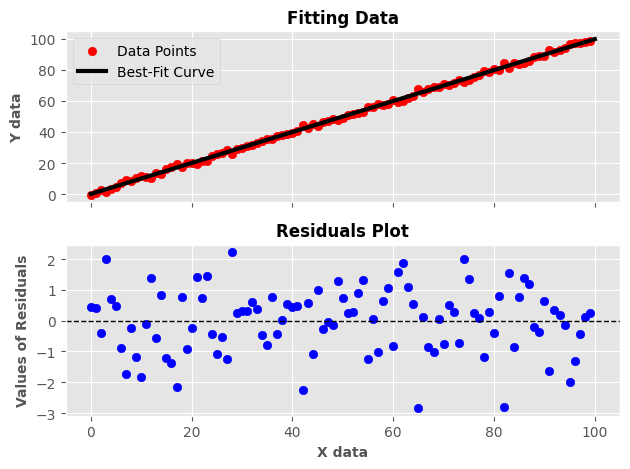

In [87]:
# Generating the residuals plot
x = np.linspace(0, N, 10000)

fig, (ax1, ax2) = plt.subplots(2, sharex= True)

ax1.scatter(x_data, y_data, label= "Data Points", color= "red")
ax1.plot(x, F(x, *popt), label= "Best-Fit Curve", color= "black", linewidth= 3)
ax1.set_ylabel("Y data", fontweight= "bold", fontsize= 10)
ax1.set_title("Fitting Data", fontweight= "bold", fontsize= 12)
ax1.legend()

ax2.scatter(x_data, residual, label= "Residuals", color= "blue")
ax2.set_xlabel("X data", fontweight= "bold", fontsize= 10)
ax2.set_ylabel("Values of Residuals", fontweight= "bold", fontsize= 10)
ax2.axhline(0, color= "black", linestyle= "--", linewidth= 1)
ax2.set_title('Residuals Plot', fontweight= "bold", fontsize= 12)

plt.tight_layout()

Math says if $N$ independent random variables $x_k$ are normally distributed, then the following sum:

$$ \sum_{k = 0}^N x_k^2 $$

follows the $\chi^2$ distribution with $N - p$ degrees of freedom, where $p$ is the total number of model parameters.

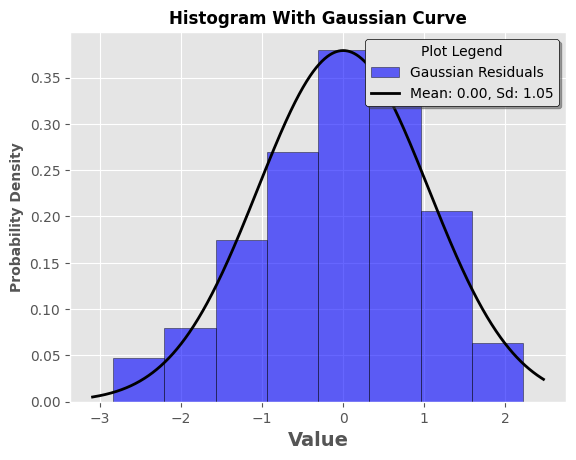

In [88]:
# Generating the histogramm of residuals
mean = np.mean(residual)
stddev = np.std(residual)

plt.hist(residual, bins= "auto", density=True, alpha=0.6, color= "blue", edgecolor= "black", label= "Gaussian Residuals")

# Plotting the Gaussian curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mean, stddev)
plt.plot(x, p, color= "black", linewidth=2, label=f"Mean: {mean:.2f}, Sd: {stddev:.2f}")

# Adding labels and title
plt.title("Histogram With Gaussian Curve", fontweight= "bold", fontsize= 12)
plt.xlabel("Value", fontweight= "bold", fontsize= 14)
plt.ylabel("Probability Density", fontweight= "bold", fontsize= 10)
plt.legend(loc= "upper right", shadow=True, frameon=True, edgecolor= "black", fontsize=10, title= "Plot Legend", title_fontsize=10)

In [89]:
# Monte Carlo Simulation for computing alternatively the parameters errors
M = 50000
popt_array = np.zeros([M, 2])

for j in range(M):
    y_data = x_data + np.random.normal(0, 1, size= N)
    popt_array[j] = curve_fit(F, x_data, y_data, p0= [popt[0], popt[1]])[0]

popt_array

array([[ 1.00077873,  0.09298835],
       [ 0.99878961, -0.02273048],
       [ 0.99633541,  0.25205265],
       ...,
       [ 1.00674914, -0.30165206],
       [ 1.00008329,  0.0299343 ],
       [ 0.99600697,  0.29592825]])

In [90]:
# Computing the slope uncertainty
E_m = float(np.std(popt_array.T[0]))
E_m

0.003460401770664466

In [91]:
# Computing the intercept uncertainty
E_q = float(np.std(popt_array.T[1]))
E_q

0.1985596780359584